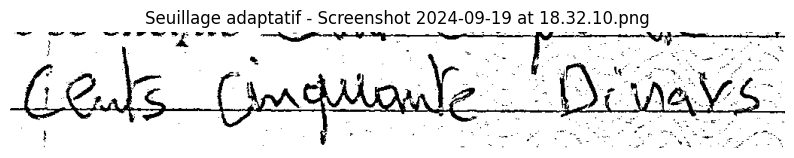

Image Screenshot 2024-09-19 at 18.32.10.png processed and saved to /Users/sarahhaddad/Documents/GitHub/TrOCR/new3/processed_Screenshot 2024-09-19 at 18.32.10.png


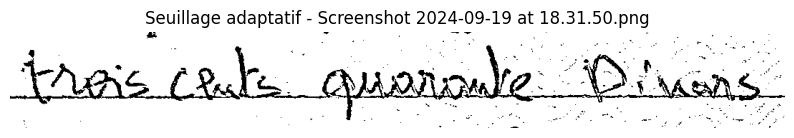

Image Screenshot 2024-09-19 at 18.31.50.png processed and saved to /Users/sarahhaddad/Documents/GitHub/TrOCR/new3/processed_Screenshot 2024-09-19 at 18.31.50.png


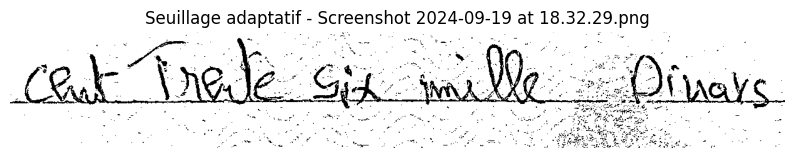

Image Screenshot 2024-09-19 at 18.32.29.png processed and saved to /Users/sarahhaddad/Documents/GitHub/TrOCR/new3/processed_Screenshot 2024-09-19 at 18.32.29.png


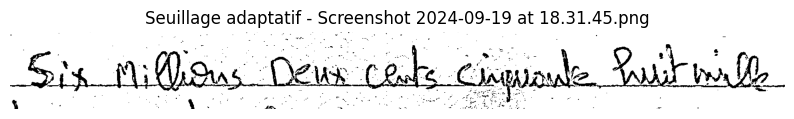

Image Screenshot 2024-09-19 at 18.31.45.png processed and saved to /Users/sarahhaddad/Documents/GitHub/TrOCR/new3/processed_Screenshot 2024-09-19 at 18.31.45.png


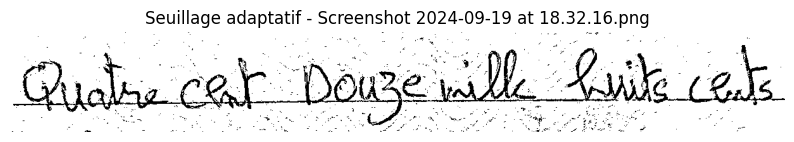

Image Screenshot 2024-09-19 at 18.32.16.png processed and saved to /Users/sarahhaddad/Documents/GitHub/TrOCR/new3/processed_Screenshot 2024-09-19 at 18.32.16.png


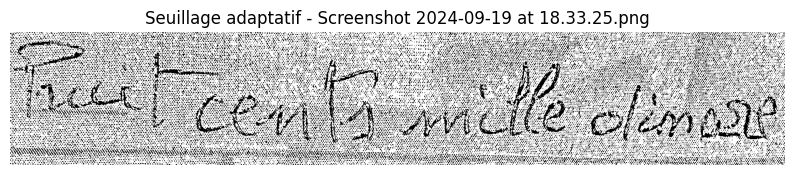

Image Screenshot 2024-09-19 at 18.33.25.png processed and saved to /Users/sarahhaddad/Documents/GitHub/TrOCR/new3/processed_Screenshot 2024-09-19 at 18.33.25.png


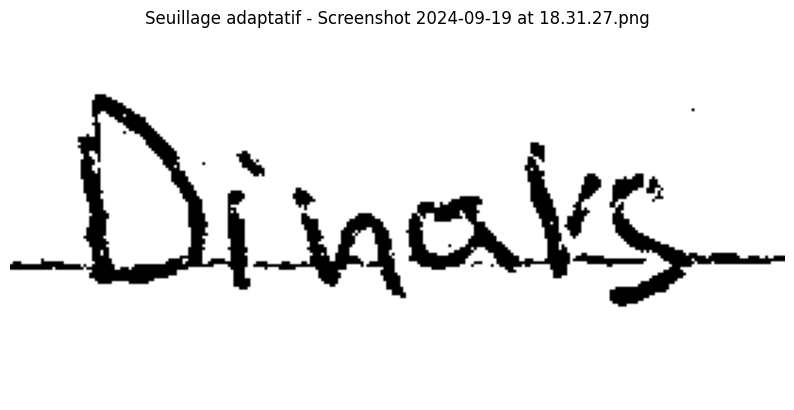

Image Screenshot 2024-09-19 at 18.31.27.png processed and saved to /Users/sarahhaddad/Documents/GitHub/TrOCR/new3/processed_Screenshot 2024-09-19 at 18.31.27.png


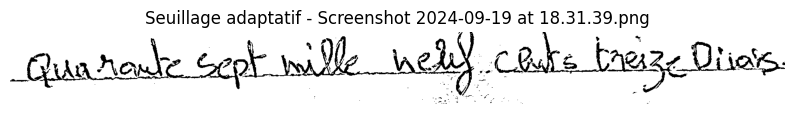

Image Screenshot 2024-09-19 at 18.31.39.png processed and saved to /Users/sarahhaddad/Documents/GitHub/TrOCR/new3/processed_Screenshot 2024-09-19 at 18.31.39.png


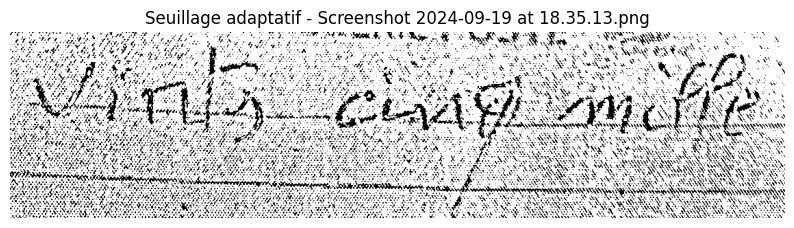

Image Screenshot 2024-09-19 at 18.35.13.png processed and saved to /Users/sarahhaddad/Documents/GitHub/TrOCR/new3/processed_Screenshot 2024-09-19 at 18.35.13.png


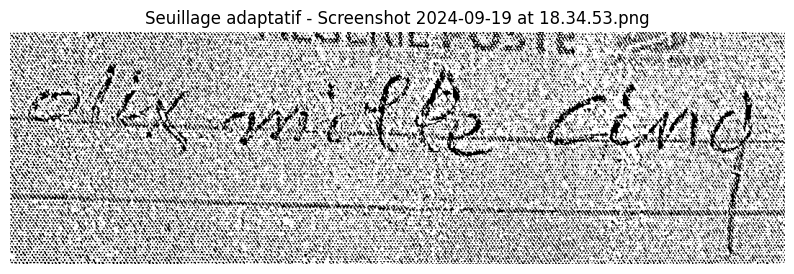

Image Screenshot 2024-09-19 at 18.34.53.png processed and saved to /Users/sarahhaddad/Documents/GitHub/TrOCR/new3/processed_Screenshot 2024-09-19 at 18.34.53.png


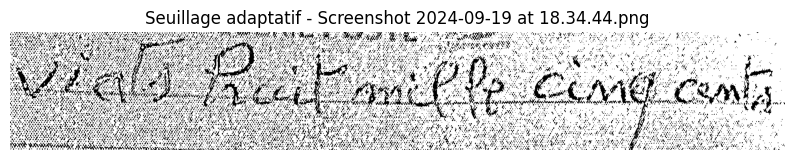

Image Screenshot 2024-09-19 at 18.34.44.png processed and saved to /Users/sarahhaddad/Documents/GitHub/TrOCR/new3/processed_Screenshot 2024-09-19 at 18.34.44.png


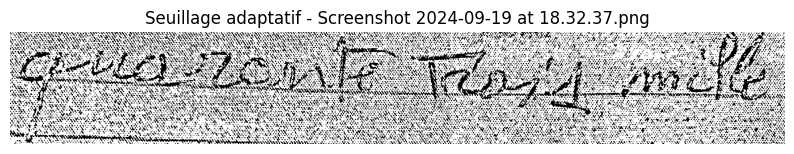

Image Screenshot 2024-09-19 at 18.32.37.png processed and saved to /Users/sarahhaddad/Documents/GitHub/TrOCR/new3/processed_Screenshot 2024-09-19 at 18.32.37.png
Processing complete!


In [2]:
import cv2
import os
import matplotlib.pyplot as plt

# Define paths
folder_image_path = '/Users/sarahhaddad/Documents/GitHub/TrOCR/data/new'
output_folder_path = '/Users/sarahhaddad/Documents/GitHub/TrOCR/data/new2'

# Ensure the output folder exists
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Loop through all the images in the folder
for filename in os.listdir(folder_image_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust based on your image formats
        image_path = os.path.join(folder_image_path, filename)
        image = cv2.imread(image_path)

        # Step 1: Noise reduction with a bilateral filter
        denoised_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

        # Step 2: Convert the image to LAB color space
        lab_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2LAB)

        # Step 3: Apply CLAHE to the L channel
        l_channel, a_channel, b_channel = cv2.split(lab_image)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        l_channel_enhanced = clahe.apply(l_channel)

        # Step 4: Merge the enhanced L channel with the original A and B channels
        lab_image_enhanced = cv2.merge((l_channel_enhanced, a_channel, b_channel))

        # Step 5: Convert back to BGR color space
        contrast_enhanced_image = cv2.cvtColor(lab_image_enhanced, cv2.COLOR_LAB2BGR)

        # Step 6: Convert the denoised image to grayscale
        gray_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)

        # Step 7: Apply CLAHE on the grayscale image
        contrast_enhanced_gray_image = clahe.apply(gray_image)

        # Step 8: Apply adaptive thresholding to get the binary image
        threshold_image = cv2.adaptiveThreshold(contrast_enhanced_gray_image, 255, 
                                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                cv2.THRESH_BINARY, 19, 10)

        # Step 9: Save the processed image to the output folder
        output_image_path = os.path.join(output_folder_path, 'processed_' + filename)
        success = cv2.imwrite(output_image_path, threshold_image)

        # Optional: Display the thresholded image
        plt.figure(figsize=(10, 5))
        plt.imshow(threshold_image, cmap='gray')
        plt.title(f'Seuillage adaptatif - {filename}')
        plt.axis('off')
        plt.show()

        # Check if image was saved successfully
        if success:
            print(f"Image {filename} processed and saved to {output_image_path}")
        else:
            print(f"Failed to save {filename}")

print("Processing complete!")

In [84]:
# Charger l'image du chèque
image_path = '/Users/sarahhaddad/Documents/GitHub/TrOCR/data/cheques/image40.jpg'
image = cv2.imread(image_path)

# Vérifier que l'image a bien été chargée
if image is None:
    print(f"Erreur : Impossible de charger l'image à partir de {image_path}")
else:
    # Détecter les bords en utilisant l'algorithme de Canny sur l'image couleur
    edges = cv2.Canny(image, 50, 150, apertureSize=3)

    # Détecter les lignes à l'aide de la transformation de Hough
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

    # Vérifier si des lignes sont détectées
    if lines is not None:
        # Calculer les angles des lignes détectées
        angles = []
        for line in lines:
            for x1, y1, x2, y2 in line:
                angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))
                angles.append(angle)

        # Calculer l'angle médian pour corriger l'inclinaison
        median_angle = np.median(angles)

        # Afficher l'angle médian
        print(f"Angle médian de l'inclinaison : {median_angle}°")

        # Ne pas effectuer la rotation si l'inclinaison est supérieure à 2 degrés
        if abs(median_angle) > 2:
            print(f"L'inclinaison est trop grande ({median_angle}°), aucune correction de rotation n'est appliquée.")
            corrected_image = image  # Pas de rotation
        else:
            # Correction de la rotation
            (h, w) = image.shape[:2]
            center = (w // 2, h // 2)
            rotation_matrix = cv2.getRotationMatrix2D(center, median_angle, 1.0)
            corrected_image = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)

            print(f"Correction de l'inclinaison de {median_angle}° effectuée.")

        # Afficher l'image originale et corrigée
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Image originale')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
        plt.title('Image corrigée')

        plt.show()

        # Enregistrer l'image corrigée
        saved_image_path = '/Users/sarahhaddad/Documents/GitHub/TrOCR/data/cheques/corrected_cheque11.jpg'
        success = cv2.imwrite(saved_image_path, corrected_image)
        if success:
            print(f"L'image corrigée a été enregistrée avec succès sous {saved_image_path}")
        else:
            print("Erreur lors de l'enregistrement de l'image.")

    else:
        print("Aucune ligne n'a été détectée pour corriger l'inclinaison.")

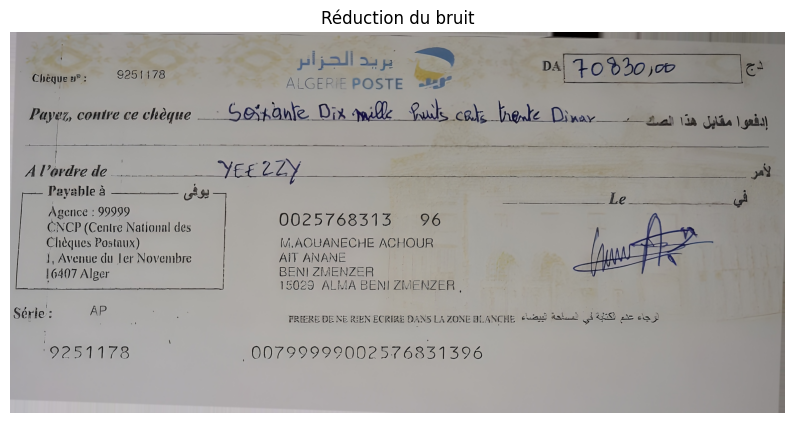

In [85]:
folder_image_path = '/Users/sarahhaddad/Documents/GitHub/TrOCR/data/cheques/new'
image = cv2.imread(image_path)

# Réduction du bruit avec un filtre bilatéral (conserve les contours tout en supprimant le bruit)
denoised_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

# Ajuster la taille de la figure
plt.figure(figsize=(10, 5))  # You can adjust the size as needed

# Afficher l'image après réduction du bruit
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.title('Réduction du bruit')
plt.axis('off')  # Optionnel, cache les axes
plt.show()

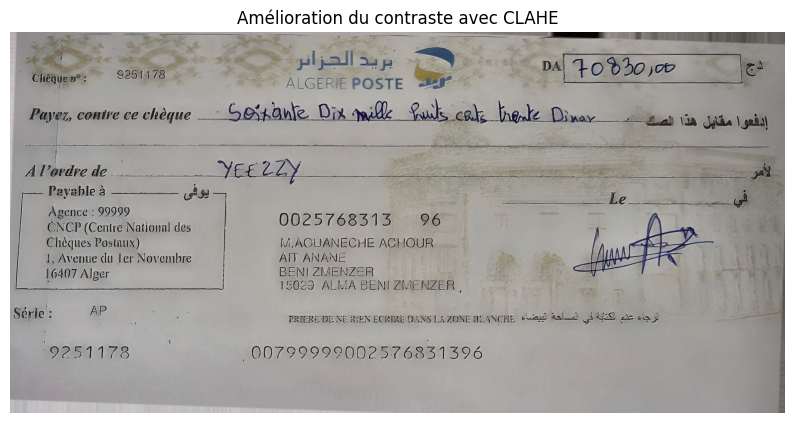

In [86]:
# Convert the image to LAB color space
lab_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2LAB)

# Split into L, A, and B channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Apply CLAHE to the L channel (which controls lightness)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
l_channel_enhanced = clahe.apply(l_channel)

# Merge the enhanced L channel with the original A and B channels
lab_image_enhanced = cv2.merge((l_channel_enhanced, a_channel, b_channel))

# Convert back to BGR color space
contrast_enhanced_image = cv2.cvtColor(lab_image_enhanced, cv2.COLOR_LAB2BGR)

# Adjust figure size
plt.figure(figsize=(10, 5))

# Display the contrast-enhanced image
plt.imshow(cv2.cvtColor(contrast_enhanced_image, cv2.COLOR_BGR2RGB))
plt.title('Amélioration du contraste avec CLAHE')
plt.axis('off')  # Optionnel, cache les axes
plt.show()

# Enregistrer l'image corrigée
saved_image_path = '/Users/sarahhaddad/Documents/GitHub/TrOCR/data/cheques/contrast_enhanced_image9.jpg'
success = cv2.imwrite(saved_image_path, corrected_image)

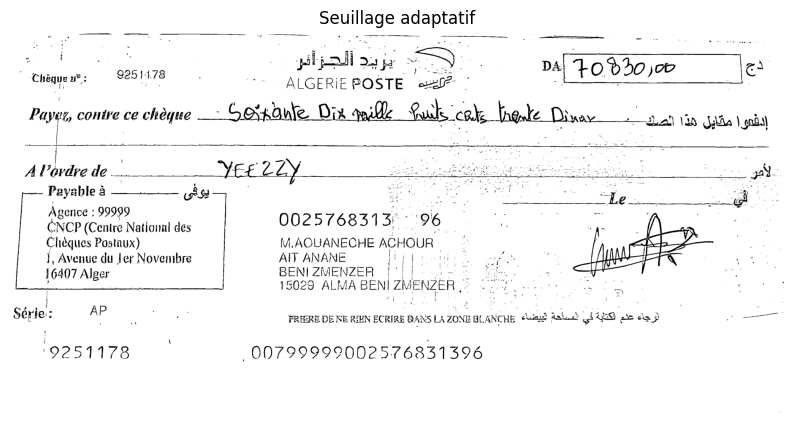

In [87]:
# Convert the denoised image to grayscale
gray_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) on the grayscale image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
contrast_enhanced_image = clahe.apply(gray_image)

# Apply adaptive thresholding to convert the contrast-enhanced image to binary (black and white)
threshold_image = cv2.adaptiveThreshold(contrast_enhanced_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 19, 10)

# Adjust figure size
plt.figure(figsize=(10, 5))

# Display the thresholded (binary) image
plt.imshow(threshold_image, cmap='gray')  # 'cmap' ensures the binary image is shown correctly
plt.title('Seuillage adaptatif')
plt.axis('off')  # Optional, hides the axes
plt.show()

# Enregistrer l'image corrigée
saved_image_path = '/Users/sarahhaddad/Documents/GitHub/TrOCR/data/cheques/threshold_image10.jpg'
success = cv2.imwrite(saved_image_path, corrected_image)